In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
# Getting relevant data in form of structured Data Frames
#data = pd.DataFrame(pd.read_csv('data_0.0017_1.txt'))
data = pd.DataFrame(pd.read_csv('data_unmodified_0.1x0.1_0.001.txt'))
data = data.drop(['j'], axis = 1)
data.sort_values(by=['theta'], inplace=True)
data = data.dropna()
data_array = pd.DataFrame.to_numpy(data).tolist()
data

exp_data = pd.read_csv('thesis data')
data.sort_values(by=['theta'], inplace=True)


In [3]:
# Creating a Dictionary structure for the Data

def checker(dict, key): 
      
    if key in dict.keys(): 
        return(True)
    else: 
        return(False) 

theta_force = {}
theta_vel = {}
theta_vel_all ={}
theta_alpha = {}
theta_alpha_last = {}
theta_alpha_ml = {}
theta_alpha_md = {} 
theta_alpha_cur = {}
theta_force_cur = {}
theta_cts = {}
theta_cts_cur = {}
for i in range(len(data_array)):
    value = int((data_array[i][0]))
    value_limit = int((data_array[i][0])%360)
    theta_force[value] = data_array[i][4]#[7]
    theta_force_cur[value_limit] = data_array[i][4]
    theta_vel[value_limit] = data_array[i][2]#[5]
    theta_alpha_cur[value_limit] = data_array[i][1]#[5]
    theta_vel_all[value] = data_array[i][2]
    theta_alpha[value] = data_array[i][1]
    theta_cts[value] = data_array[i][3]
    theta_cts_cur[value_limit] = data_array[i][3]
#    theta_alpha_last[value] = data_array[i][2]
#    theta_alpha_ml[value] = data_array[i][3]
#    theta_alpha_md[value] = data_array[i][4]



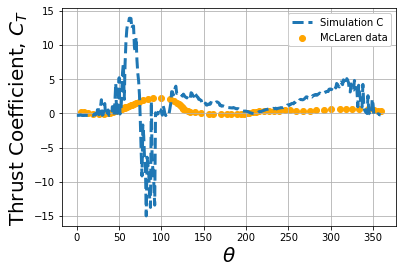

In [9]:
# Sepearting Data For Operations
theta = list(dict.keys(theta_force))
theta_limit = list(dict.keys(theta_vel))
fts = list(dict.values(theta_force))
fts_cur = list(dict.values(theta_force_cur))
vel = list(dict.values(theta_vel))
alpha = list(dict.values(theta_alpha))
alpha_cur = list(dict.values(theta_alpha_cur))
cts = list(dict.values(theta_cts))
cts_cur = list(dict.values(theta_cts_cur))
#alpha_ml = list(dict.values(theta_alpha_ml))
#alpha_md = list(dict.values(theta_alpha_md))

#alpha_dot = ((np.array(alpha) - np.array(alpha_last))/0.003)

#plt.plot(theta,np.array(fts))
#plt.plot(theta,np.array(cts))
#plt.scatter(theta_limit,np.array(alpha_cur))
#plt.xlabel("theta")
#plt.ylabel("ct")
#plt.ylabel("Ft")
#plt.ylabel("alpha")
#plt.ylabel("alpha_dot")

lists = sorted(theta_force.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(np.array(x[1320:1680])-1320, np.array(y[1320:1680])/(25.725*25), '--' ,label = "Simulation C", linewidth=3 )
plt.scatter(exp_data['theta'], exp_data['value'], label = "McLaren data",linewidth=1, color='orange')
plt.legend(framealpha=1, frameon=True)
plt.xlabel(r'$\theta$', fontsize=20)
plt.ylabel('Thrust Coefficient, ' + r'$C_T$', fontsize=20)
plt.grid()
#plt.figtext(.3,.95,'Mc-Laren', fontsize=30, ha='center')
#plt.figtext(.65,.95,'Comparision',fontsize=25,ha='center')

In [5]:
#setting up constants for the calculation
w = 10
r = 1.4
n = 3
u_inf = 10

# calculating Pt
integral = 0

force = y[1320:1680]

for j in range(len(force)-1):
    Fdtheta = (fts_cur[j+1] + fts_cur[j])*(theta[j+1] - theta[j])/50
    integral += Fdtheta

tot_dtheta = x[1680] - x[1320]

Pt = w*r*3*(integral/tot_dtheta)

#Calculating Pn

Pn = 0.5*1.225*10*10*10*2*r*1
Pt/Pn

0.9950077562884346

In [6]:
x[-1]

3885

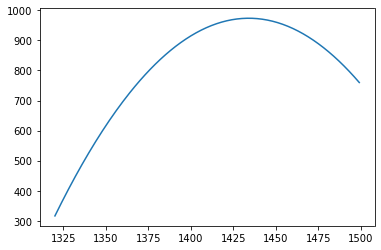

In [7]:
z = np.polyfit(x[1320:1500],y[1320:1500],2)
p = np.poly1d(z)

plt.plot(x[1320:1500],p(x[1320:1500]))